In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
data=pd.read_csv('age.csv') 
print(data)

            db                           full_path  age  gender
0      UTKface  part1/41_0_2_20170105164126307.jpg   41       1
1      UTKface  part1/80_1_0_20170110122217473.jpg   80       0
2      UTKface  part1/56_0_0_20170111202842202.jpg   56       1
3      UTKface  part1/82_1_0_20170110141329969.jpg   82       0
4      UTKface  part1/16_1_4_20170102234841875.jpg   16       0
...        ...                                 ...  ...     ...
24099  UTKface  part3/31_1_3_20170119200101732.jpg   31       0
24100  UTKface  part3/24_1_1_20170116225255798.jpg   24       0
24101  UTKface  part3/39_0_3_20170119203757237.jpg   39       1
24102  UTKface  part3/44_1_3_20170119192758593.jpg   44       0
24103  UTKface  part3/78_1_0_20170120224727472.jpg   78       0

[24104 rows x 4 columns]


In [6]:
data.head()

,db,full_path,age,gender
0,UTKface,part1/41_0_2_20170105164126307.jpg,41,1
1,UTKface,part1/80_1_0_20170110122217473.jpg,80,0
2,UTKface,part1/56_0_0_20170111202842202.jpg,56,1
3,UTKface,part1/82_1_0_20170110141329969.jpg,82,0
4,UTKface,part1/16_1_4_20170102234841875.jpg,16,0


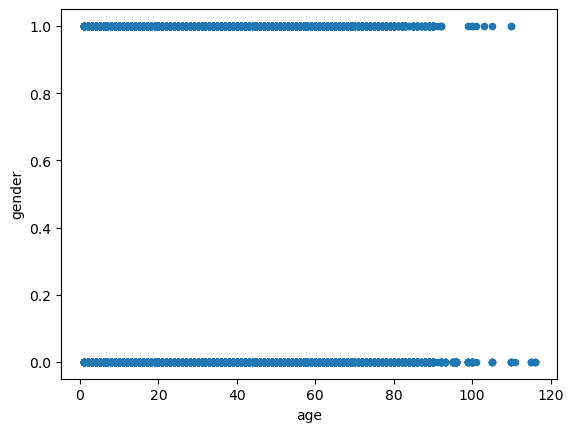

In [7]:
data.plot.scatter(x='age', y='gender');

In [8]:
data.shape

(24104, 4)

# Data Preprocessing dividing dependent and independent values 

In [9]:
x=data['age'].values.reshape(-1,1)
y=data['gender'].values.reshape(-1,1)#depending 

In [10]:
x.shape

(24104, 1)

In [11]:
SEED = 30

In [12]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 30)

In [13]:
print(x_train)
print(y_train)

[[23]
 [ 1]
 [24]
 ...
 [54]
 [29]
 [52]]
[[0]
 [0]
 [0]
 ...
 [1]
 [0]
 [1]]


In [14]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()

In [15]:
regressor.fit(x_train, y_train)

LinearRegression()

In [16]:
y_pred = regressor.predict(x_test)

In [17]:
df_preds = pd.DataFrame({'Actual': y_test.squeeze(), 'Predicted': y_pred.squeeze()})
print(df_preds)

      Actual  Predicted
0          1   0.496964
1          0   0.493954
2          1   0.512011
3          0   0.496964
4          1   0.617343
...      ...        ...
4816       0   0.505992
4817       0   0.475897
4818       1   0.496964
4819       1   0.509002
4820       1   0.484926

[4821 rows x 2 columns]


In [18]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

In [19]:
print(f'Mean absolute error: {mae:.2f}')
print(f'Mean squared error: {mse:.2f}')
print(f'Root mean squared error: {rmse:.2f}')

Mean absolute error: 0.49
Mean squared error: 0.24
Root mean squared error: 0.49


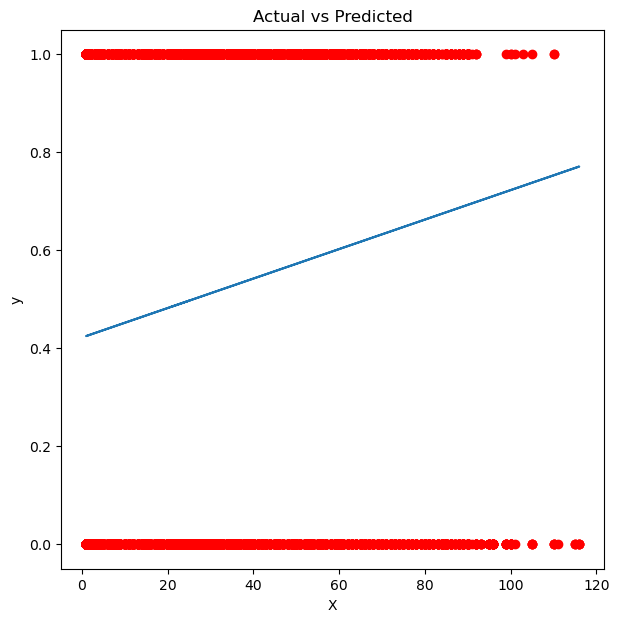

In [20]:
plt.figure(figsize=(7, 7))
plt.plot(x,y,'ro')     # regression line
plt.plot(x_test,y_pred)   # scatter plot showing actual data
plt.title('Actual vs Predicted')
plt.xlabel('X')
plt.ylabel('y')
plt.show()